# M5P in R

## Manual
- https://stats.stackexchange.com/questions/78563/regression-tree-algorithm-with-linear-regression-models-in-each-leaf
- https://books.google.co.jp/books?id=X3a6DgAAQBAJ&pg=PT265&lpg=PT265&dq=m5+回帰&source=bl&ots=DpvgEg8JBj&sig=QyT5-M1ANaLAWNvBfNLCBCgKLtM&hl=ja&sa=X&ved=0ahUKEwjs3q7YterXAhWJvbwKHbohBY0Q6AEINDAD#v=onepage&q&f=false

## Regression

In [1]:
library("party")
data("BostonHousing", package = "mlbench")
head(BostonHousing)
BostonHousing$lstat <- log(BostonHousing$lstat)
BostonHousing$rm <- BostonHousing$rm^2
BostonHousing$chas <- factor(BostonHousing$chas, levels = 0:1, labels = c("no", "yes"))
BostonHousing$rad <- factor(BostonHousing$rad, ordered = TRUE)
head(BostonHousing)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,no,0.538,43.23063,65.2,4.0900,1,296,15.3,396.90,1.605430,24.0
0.02731,0,7.07,no,0.469,41.22924,78.9,4.9671,2,242,17.8,396.90,2.212660,21.6
0.02729,0,7.07,no,0.469,51.62422,61.1,4.9671,2,242,17.8,392.83,1.393766,34.7
0.03237,0,2.18,no,0.458,48.97200,45.8,6.0622,3,222,18.7,394.63,1.078410,33.4
0.06905,0,2.18,no,0.458,51.07961,54.2,6.0622,3,222,18.7,396.90,1.673351,36.2
0.02985,0,2.18,no,0.458,41.34490,58.7,6.0622,3,222,18.7,394.12,1.650580,28.7


In [13]:
library(RWeka)
model = M5P (medv~., data=BostonHousing, control=Weka_control(N=F, M=10))
predicted = predict(model, BostonHousing)
model

M5 pruned model tree:
(using smoothed linear models)

lstat <= 2.275 : 
|   rm <= 48.177 : 
|   |   dis <= 3.325 : LM1 (30/58.951%)
|   |   dis >  3.325 : LM2 (112/20.705%)
|   rm >  48.177 : 
|   |   rm <= 55.309 : LM3 (40/49.811%)
|   |   rm >  55.309 : LM4 (30/48.746%)
lstat >  2.275 : 
|   lstat <= 2.708 : LM5 (132/29.27%)
|   lstat >  2.708 : 
|   |   crim <= 5.769 : 
|   |   |   crim <= 0.654 : 
|   |   |   |   dis <= 1.906 : LM6 (10/22.305%)
|   |   |   |   dis >  1.906 : LM7 (36/26.564%)
|   |   |   crim >  0.654 : 
|   |   |   |   ptratio <= 20.6 : 
|   |   |   |   |   nox <= 0.706 : LM8 (5/22.865%)
|   |   |   |   |   nox >  0.706 : LM9 (19/20.94%)
|   |   |   |   ptratio >  20.6 : LM10 (13/9.928%)
|   |   crim >  5.769 : 
|   |   |   lstat <= 2.982 : LM11 (29/20.273%)
|   |   |   lstat >  2.982 : 
|   |   |   |   nox <= 0.675 : LM12 (16/35.377%)
|   |   |   |   nox >  0.675 : LM13 (34/17.961%)

LM num: 1
medv = 
	3.4757 * crim 
	- 0.0765 * indus 
	- 0.8402 * nox 
	+ 0.1183 *

In [14]:
summary(model)


=== Summary ===

Correlation coefficient                  0.9513
Mean absolute error                      2.0272
Root mean squared error                  2.8445
Relative absolute error                 30.4971 %
Root relative squared error             30.9588 %
Total Number of Instances              506     

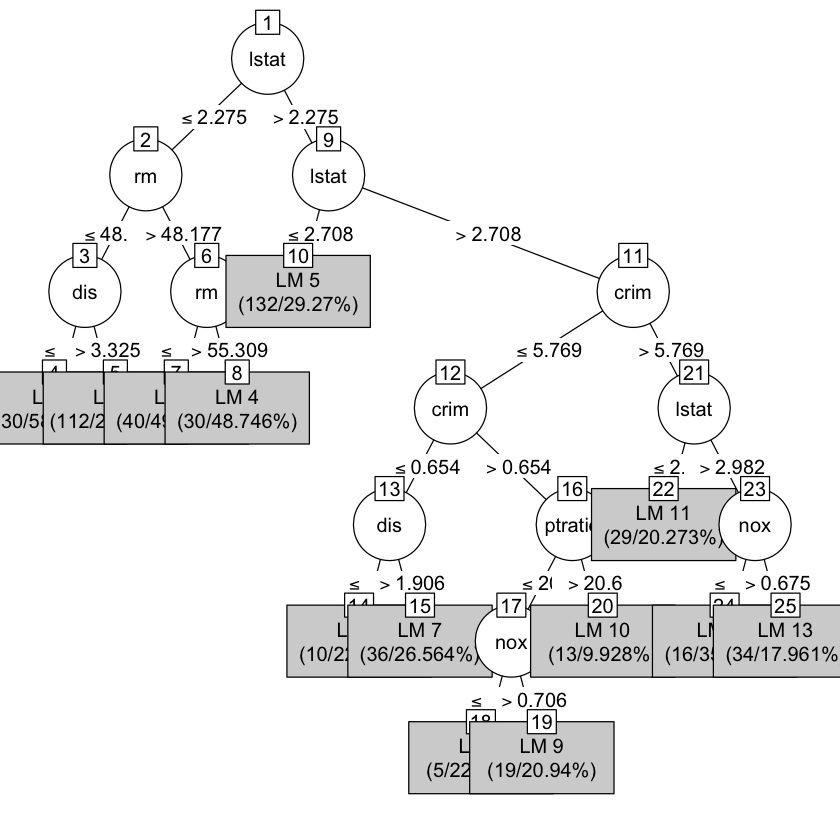

In [15]:
library(party)
library(partykit)
plot(as.party.Weka_tree(model))